In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


1. **UNZIP THE FOLDER**

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
ls

'Colab Notebooks'/   dataset/   flowers/   Flowers-Dataset.zip   flowers.h5


In [ ]:
pwd

'/content/drive/MyDrive'

**2.IMAGE AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 6 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 37 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'.ipynb_checkpoints': 0,
 'daisy': 1,
 'dandelion': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

3.**CREATE MODEL  
4.ADD THE LAYERS**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*(3*3*3+1)


896

HIDDEN LAYERS

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

OUTPUT LAYERS

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

180

In [ ]:
4317/24

179.875

5.**COMPILE THE MODEL**

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')
print("model is now ready to use")
model.summary()

model is now ready to use
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               9225900   
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 4)                 604       
                            

6.**FIT THE MODEL**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
x = np.arange(1, 25).reshape(12, 2)

In [ ]:
 y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [ ]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train

array([[23, 24],
       [13, 14],
       [17, 18],
       [15, 16],
       [11, 12],
       [21, 22],
       [ 5,  6],
       [19, 20],
       [ 1,  2]])

In [ ]:
y_train

array([0, 0, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
x_test

array([[ 9, 10],
       [ 3,  4],
       [ 7,  8]])

In [ ]:
y_test

array([1, 1, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=4, random_state=4)

In [ ]:
x_train

array([[17, 18],
       [ 5,  6],
       [23, 24],
       [ 1,  2],
       [ 3,  4],
       [11, 12],
       [15, 16],
       [21, 22]])

In [ ]:
x_test

array([[ 7,  8],
       [ 9, 10],
       [13, 14],
       [19, 20]])

In [ ]:
y_train

array([1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
y_test

array([0, 1, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, stratify=y)

In [ ]:
x_train

array([[21, 22],
       [ 1,  2],
       [15, 16],
       [13, 14],
       [17, 18],
       [19, 20],
       [23, 24],
       [ 3,  4]])

In [ ]:
x_test

array([[11, 12],
       [ 7,  8],
       [ 5,  6],
       [ 9, 10]])

In [ ]:
y_train

array([1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
y_test

array([0, 0, 1, 1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

In [ ]:
x_train

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16]])

In [ ]:
x_test

array([[17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [ ]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 0])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = np.arange(20).reshape(-1, 1)
y = np.array([5, 12, 11, 19, 30, 29, 23, 40, 51, 54, 74,62, 68, 73, 89, 84, 89, 101, 99, 106])

In [ ]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [ ]:
y

array([  5,  12,  11,  19,  30,  29,  23,  40,  51,  54,  74,  62,  68,
        73,  89,  84,  89, 101,  99, 106])

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=8, random_state=0)

In [ ]:
model = LinearRegression().fit(x_train, y_train)

In [ ]:
model.intercept_

3.1617195496417523

In [ ]:
model.coef_

array([5.53121801])

In [ ]:
model.score(x_train, y_train)

0.9868175024574795

In [ ]:
model.score(x_test, y_test)

0.9465896927715023

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(x)
x = scalar.transform(x)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x, y, epochs=10, verbose=5)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


7.**SAVE THE MODEL**

In [ ]:
ls

'Colab Notebooks'/   dataset/   flowers/   Flowers-Dataset.zip   flowers.h5


In [ ]:
model.save('flowers.h5')

In [ ]:
ls

'Colab Notebooks'/   dataset/   flowers/   Flowers-Dataset.zip   flowers.h5


8.**TEST THE MODEL**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('flowers.h5')

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/Testing/rose/388405293_4db1d71f21_n.jpg")

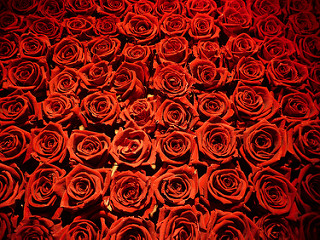

In [ ]:
img

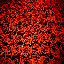

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/Testing/rose/388405293_4db1d71f21_n.jpg",target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 209.,   1.],
        [249., 202.,   2.],
        [200., 166.,  32.],
        ...,
        [255., 228.,   1.],
        [255., 239.,   3.],
        [255., 233.,   0.]],

       [[255., 213.,   4.],
        [255., 209.,   1.],
        [231., 190.,  10.],
        ...,
        [255., 233.,   2.],
        [255., 237.,   3.],
        [255., 234.,   0.]],

       [[254., 219.,  15.],
        [255., 211.,   0.],
        [255., 207.,   3.],
        ...,
        [254., 237.,   1.],
        [253., 228.,   1.],
        [255., 238.,   2.]],

       ...,

       [[255., 200.,   1.],
        [254., 201.,   1.],
        [254., 201.,   1.],
        ...,
        [254., 237.,   1.],
        [255., 240.,  49.],
        [254., 247.,  79.]],

       [[254., 208.,   0.],
        [254., 206.,   0.],
        [254., 206.,   0.],
        ...,
        [253., 241.,   0.],
        [255., 254.,  84.],
        [255., 254., 101.]],

       [[255., 216.,   1.],
        [255., 214.,   2.],
        [255., 2

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[255., 209.,   1.],
         [249., 202.,   2.],
         [200., 166.,  32.],
         ...,
         [255., 228.,   1.],
         [255., 239.,   3.],
         [255., 233.,   0.]],

        [[255., 213.,   4.],
         [255., 209.,   1.],
         [231., 190.,  10.],
         ...,
         [255., 233.,   2.],
         [255., 237.,   3.],
         [255., 234.,   0.]],

        [[254., 219.,  15.],
         [255., 211.,   0.],
         [255., 207.,   3.],
         ...,
         [254., 237.,   1.],
         [253., 228.,   1.],
         [255., 238.,   2.]],

        ...,

        [[255., 200.,   1.],
         [254., 201.,   1.],
         [254., 201.,   1.],
         ...,
         [254., 237.,   1.],
         [255., 240.,  49.],
         [254., 247.,  79.]],

        [[254., 208.,   0.],
         [254., 206.,   0.],
         [254., 206.,   0.],
         ...,
         [253., 241.,   0.],
         [255., 254.,  84.],
         [255., 254., 101.]],

        [[255., 216.,   1.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)

In [ ]:
y

array([2])

In [ ]:
x_train.class_indices

{'.ipynb_checkpoints': 0,
 'daisy': 1,
 'dandelion': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index [y[0]]

'rose'

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/Testing/rose/145862135_ab710de93c_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

'rose'